In [255]:
import pandas as pd
import numpy as np

In [256]:
data=pd.read_csv('train.csv')

In [257]:
data.head()

,id,distance,taxi_type,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_1,anon_var_2,anon_var_3,sex,pricing_category
0,T0005891966,59.30,C,1.0,NaN,NaN,B,1.18625,0,NaN,50,71,Male,2
1,T0005902453,20.68,B,0.0,2.79222,C,B,1.91750,1,31.0,50,65,Male,2
2,T0005847289,64.83,B,1.0,2.97482,C,A,3.62125,0,65.0,49,84,Male,2
3,T0005741279,25.51,C,0.0,2.90334,A,B,4.76750,2,46.0,43,60,Female,3
4,T0005711058,20.16,D,6.0,2.62301,B,D,2.03875,0,NaN,52,71,Female,3


In [259]:
data.shape

(78997, 14)

In [258]:
#Identify null values
print(data.isnull().sum())

id                               0
distance                         0
taxi_type                    12152
months_of_activity            3533
customer_score               12041
customer_score_confidence    12041
drop_location_type               0
ratings_given_by_cust            0
num_of_cancelled_trips           0
anon_var_1                   42419
anon_var_2                       0
anon_var_3                       0
sex                              0
pricing_category                 0
dtype: int64


In [224]:
data['taxi_type'].value_counts() # go with max or mean

B    18644
C    16827
A    13011
D    11348
E     7015
Name: taxi_type, dtype: int64

In [225]:
data['months_of_activity'].value_counts() #go with mean

10.0    25608
2.0      7012
3.0      6221
0.0      6152
5.0      5203
1.0      4932
4.0      4604
7.0      4432
6.0      4405
8.0      3785
9.0      3110
Name: months_of_activity, dtype: int64

In [226]:
data['customer_score'].value_counts() # go with average 

2.78450    9
2.77447    9
2.69907    9
2.70697    9
2.70093    9
2.70370    9
2.87170    9
2.78285    9
2.78465    9
2.77256    9
2.81590    8
2.80728    8
2.60123    8
2.77371    8
3.08081    8
2.81827    8
2.71425    8
2.78127    8
2.77198    8
2.77664    8
2.77746    8
2.77651    8
2.77608    8
2.77869    8
2.81921    8
2.77571    8
2.81916    7
2.86221    7
2.74162    7
2.70731    7
          ..
2.54432    1
2.84545    1
3.00144    1
2.51220    1
2.21665    1
2.76896    1
2.95610    1
2.76010    1
3.01131    1
2.57420    1
3.15128    1
3.17243    1
2.63734    1
3.17516    1
2.42990    1
2.95223    1
2.09799    1
2.62206    1
3.20320    1
2.23802    1
2.87407    1
2.52021    1
2.88669    1
3.16177    1
2.70131    1
2.78730    1
3.01728    1
3.04421    1
2.66349    1
2.90963    1
Name: customer_score, Length: 42214, dtype: int64

In [227]:
 data['customer_score_confidence'].value_counts() # go with B

B    24148
C    21639
A    21169
Name: customer_score_confidence, dtype: int64

In [228]:
data.drop(columns=['anon_var_1','id'],inplace=True)

In [229]:
data.head()

,distance,taxi_type,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,59.30,C,1.0,NaN,NaN,B,1.18625,0,50,71,Male,2
1,20.68,B,0.0,2.79222,C,B,1.91750,1,50,65,Male,2
2,64.83,B,1.0,2.97482,C,A,3.62125,0,49,84,Male,2
3,25.51,C,0.0,2.90334,A,B,4.76750,2,43,60,Female,3
4,20.16,D,6.0,2.62301,B,D,2.03875,0,52,71,Female,3


In [230]:
values = {'taxi_type': 'B', 'customer_score_confidence': 'B'}
data.fillna(value=values,inplace=True)

In [231]:
#Identify null values
print(data.isnull().sum())

distance                         0
taxi_type                        0
months_of_activity            3533
customer_score               12041
customer_score_confidence        0
drop_location_type               0
ratings_given_by_cust            0
num_of_cancelled_trips           0
anon_var_2                       0
anon_var_3                       0
sex                              0
pricing_category                 0
dtype: int64


In [232]:
data['months_of_activity'] = data['months_of_activity'].fillna((data['months_of_activity'].mean()))

In [233]:
data['customer_score'] = data['customer_score'].fillna((data['customer_score'].mean()))

In [234]:
#Identify null values
print(data.isnull().sum())

distance                     0
taxi_type                    0
months_of_activity           0
customer_score               0
customer_score_confidence    0
drop_location_type           0
ratings_given_by_cust        0
num_of_cancelled_trips       0
anon_var_2                   0
anon_var_3                   0
sex                          0
pricing_category             0
dtype: int64


In [235]:
data['pricing_category'].value_counts()

2    34028
3    28586
1    16383
Name: pricing_category, dtype: int64

In [236]:
dummies_taxi_type=pd.get_dummies(data.taxi_type,prefix='T_')

In [237]:
dummies_taxi_type.head()

,T__A,T__B,T__C,T__D,T__E
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [238]:
data=pd.concat([dummies_taxi_type,data],axis='columns')

In [239]:

data.drop(columns=['taxi_type'],inplace=True)

In [240]:
data.head()

,T__A,T__B,T__C,T__D,T__E,distance,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,0,1,0,0,59.30,1.0,2.80145,B,B,1.18625,0,50,71,Male,2
1,0,1,0,0,0,20.68,0.0,2.79222,C,B,1.91750,1,50,65,Male,2
2,0,1,0,0,0,64.83,1.0,2.97482,C,A,3.62125,0,49,84,Male,2
3,0,0,1,0,0,25.51,0.0,2.90334,A,B,4.76750,2,43,60,Female,3
4,0,0,0,1,0,20.16,6.0,2.62301,B,D,2.03875,0,52,71,Female,3


In [241]:
customer_score_confidence=pd.get_dummies(data.customer_score_confidence,prefix='csc_')

In [242]:
data=pd.concat([customer_score_confidence,data],axis='columns')
data.head()

,csc__A,csc__B,csc__C,T__A,T__B,T__C,T__D,T__E,distance,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,1,0,0,0,1,0,0,59.30,1.0,2.80145,B,B,1.18625,0,50,71,Male,2
1,0,0,1,0,1,0,0,0,20.68,0.0,2.79222,C,B,1.91750,1,50,65,Male,2
2,0,0,1,0,1,0,0,0,64.83,1.0,2.97482,C,A,3.62125,0,49,84,Male,2
3,1,0,0,0,0,1,0,0,25.51,0.0,2.90334,A,B,4.76750,2,43,60,Female,3
4,0,1,0,0,0,0,1,0,20.16,6.0,2.62301,B,D,2.03875,0,52,71,Female,3


In [243]:
data.drop(columns=['customer_score_confidence'],inplace=True)

In [244]:
data.head()

,csc__A,csc__B,csc__C,T__A,T__B,T__C,T__D,T__E,distance,months_of_activity,customer_score,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,1,0,0,0,1,0,0,59.30,1.0,2.80145,B,1.18625,0,50,71,Male,2
1,0,0,1,0,1,0,0,0,20.68,0.0,2.79222,B,1.91750,1,50,65,Male,2
2,0,0,1,0,1,0,0,0,64.83,1.0,2.97482,A,3.62125,0,49,84,Male,2
3,1,0,0,0,0,1,0,0,25.51,0.0,2.90334,B,4.76750,2,43,60,Female,3
4,0,1,0,0,0,0,1,0,20.16,6.0,2.62301,D,2.03875,0,52,71,Female,3


In [245]:
drop_location_type=pd.get_dummies(data.drop_location_type,prefix='dlt_')

In [246]:
data=pd.concat([drop_location_type,data],axis='columns')
data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,distance,months_of_activity,customer_score,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,1,0,0,0,0,0,0,0,0,...,59.30,1.0,2.80145,B,1.18625,0,50,71,Male,2
1,0,1,0,0,0,0,0,0,0,0,...,20.68,0.0,2.79222,B,1.91750,1,50,65,Male,2
2,1,0,0,0,0,0,0,0,0,0,...,64.83,1.0,2.97482,A,3.62125,0,49,84,Male,2
3,0,1,0,0,0,0,0,0,0,0,...,25.51,0.0,2.90334,B,4.76750,2,43,60,Female,3
4,0,0,0,1,0,0,0,0,0,0,...,20.16,6.0,2.62301,D,2.03875,0,52,71,Female,3


In [247]:
data.drop(columns=['drop_location_type'],inplace=True)
data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,T__E,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,1,0,0,0,0,0,0,0,0,...,0,59.30,1.0,2.80145,1.18625,0,50,71,Male,2
1,0,1,0,0,0,0,0,0,0,0,...,0,20.68,0.0,2.79222,1.91750,1,50,65,Male,2
2,1,0,0,0,0,0,0,0,0,0,...,0,64.83,1.0,2.97482,3.62125,0,49,84,Male,2
3,0,1,0,0,0,0,0,0,0,0,...,0,25.51,0.0,2.90334,4.76750,2,43,60,Female,3
4,0,0,0,1,0,0,0,0,0,0,...,0,20.16,6.0,2.62301,2.03875,0,52,71,Female,3


In [248]:
Gender=pd.get_dummies(data.sex)

In [249]:
data=pd.concat([Gender,data],axis='columns')
data.head()

,Female,Male,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,...,T__E,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex,pricing_category
0,0,1,0,1,0,0,0,0,0,0,...,0,59.30,1.0,2.80145,1.18625,0,50,71,Male,2
1,0,1,0,1,0,0,0,0,0,0,...,0,20.68,0.0,2.79222,1.91750,1,50,65,Male,2
2,0,1,1,0,0,0,0,0,0,0,...,0,64.83,1.0,2.97482,3.62125,0,49,84,Male,2
3,1,0,0,1,0,0,0,0,0,0,...,0,25.51,0.0,2.90334,4.76750,2,43,60,Female,3
4,1,0,0,0,0,1,0,0,0,0,...,0,20.16,6.0,2.62301,2.03875,0,52,71,Female,3


In [250]:
data.drop(columns=['sex'],inplace=True)
data.head()

,Female,Male,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,...,T__D,T__E,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,pricing_category
0,0,1,0,1,0,0,0,0,0,0,...,0,0,59.30,1.0,2.80145,1.18625,0,50,71,2
1,0,1,0,1,0,0,0,0,0,0,...,0,0,20.68,0.0,2.79222,1.91750,1,50,65,2
2,0,1,1,0,0,0,0,0,0,0,...,0,0,64.83,1.0,2.97482,3.62125,0,49,84,2
3,1,0,0,1,0,0,0,0,0,0,...,0,0,25.51,0.0,2.90334,4.76750,2,43,60,3
4,1,0,0,0,0,1,0,0,0,0,...,1,0,20.16,6.0,2.62301,2.03875,0,52,71,3


In [251]:
data.T__B.head()

0    0
1    1
2    1
3    0
4    0
Name: T__B, dtype: uint8

In [252]:
list(data.columns) 

['Female',
 'Male',
 'dlt__A',
 'dlt__B',
 'dlt__C',
 'dlt__D',
 'dlt__E',
 'dlt__F',
 'dlt__G',
 'dlt__H',
 'dlt__I',
 'dlt__J',
 'dlt__K',
 'dlt__L',
 'dlt__M',
 'dlt__N',
 'csc__A',
 'csc__B',
 'csc__C',
 'T__A',
 'T__B',
 'T__C',
 'T__D',
 'T__E',
 'distance',
 'months_of_activity',
 'customer_score',
 'ratings_given_by_cust',
 'num_of_cancelled_trips',
 'anon_var_2',
 'anon_var_3',
 'pricing_category']

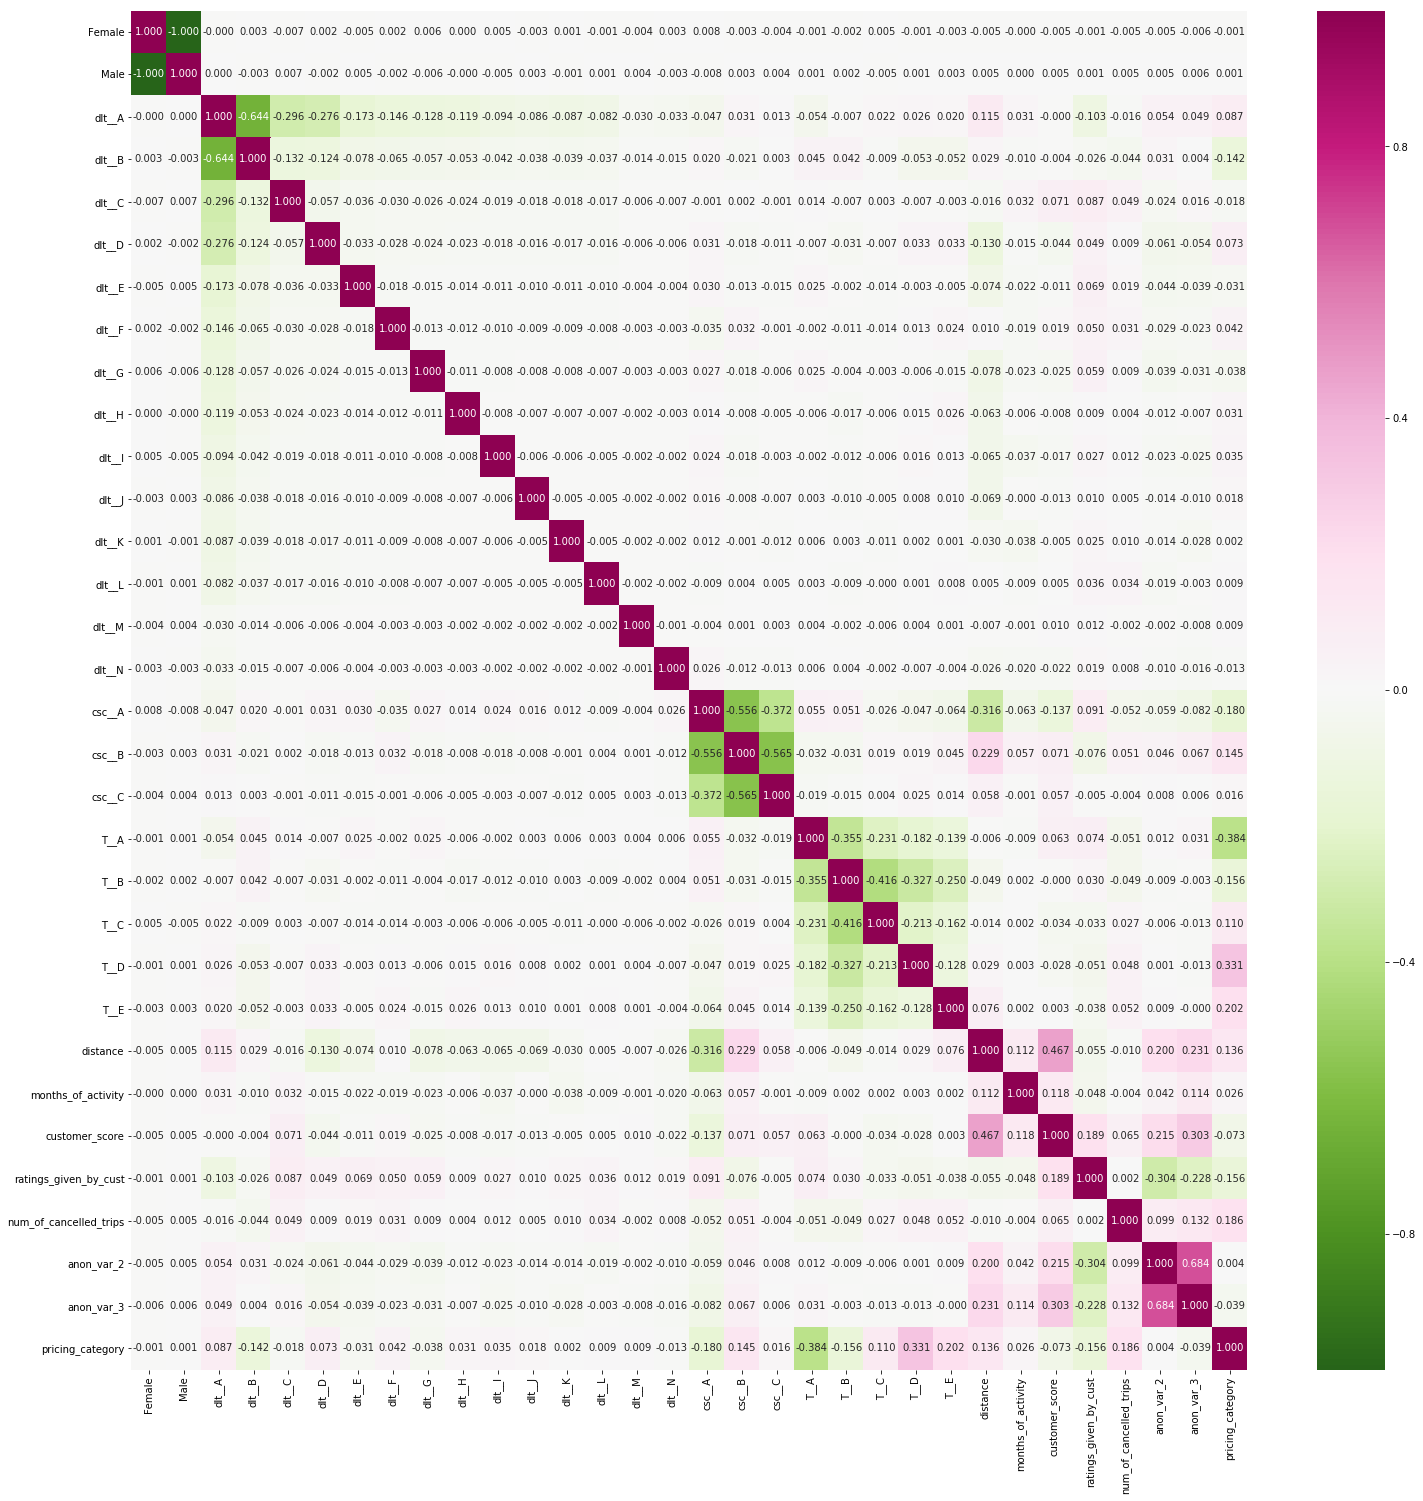

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
corrs = data.corr()

plt.figure(figsize = (25, 25))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

In [254]:
data.drop(columns=['Male','Female'],inplace=True)
data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,T__D,T__E,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,pricing_category
0,0,1,0,0,0,0,0,0,0,0,...,0,0,59.30,1.0,2.80145,1.18625,0,50,71,2
1,0,1,0,0,0,0,0,0,0,0,...,0,0,20.68,0.0,2.79222,1.91750,1,50,65,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,64.83,1.0,2.97482,3.62125,0,49,84,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,25.51,0.0,2.90334,4.76750,2,43,60,3
4,0,0,0,1,0,0,0,0,0,0,...,1,0,20.16,6.0,2.62301,2.03875,0,52,71,3


In [127]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [128]:
y = data['pricing_category']
train = data.drop(columns=['pricing_category'])

In [129]:
x_train,x_test,y_train,y_test = train_test_split(train,y,random_state=0,test_size=0.25)

In [140]:
clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

In [141]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
ypred = clf.predict(x_test)

In [143]:
clf.score(x_test,y_test)

0.6820253164556962

In [145]:
test_data=pd.read_csv('test.csv')
test_data.head()

,id,distance,taxi_type,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_1,anon_var_2,anon_var_3,sex
0,T0005834792,36.30,C,5.0,NaN,NaN,B,2.37500,0,NaN,49,86,Female
1,T0005896349,22.56,NaN,5.0,2.80098,A,C,2.30875,0,NaN,51,67,Male
2,T0005775167,75.09,A,8.0,NaN,NaN,B,3.54000,0,NaN,49,65,Male
3,T0005776893,59.44,C,8.0,NaN,NaN,A,2.86500,2,68.0,53,86,Male
4,T0005801375,109.21,D,10.0,3.23056,B,A,2.70000,1,43.0,56,92,Female


In [147]:
#Identify null values
print(test_data.isnull().sum())

id                               0
distance                         0
taxi_type                     8058
months_of_activity            2387
customer_score                8152
customer_score_confidence     8152
drop_location_type               0
ratings_given_by_cust            0
num_of_cancelled_trips           0
anon_var_1                   28611
anon_var_2                       0
anon_var_3                       0
sex                              0
dtype: int64


In [148]:
test_data.drop(columns=['anon_var_1'],inplace=True)

In [149]:
values = {'taxi_type': 'B', 'customer_score_confidence': 'B'}
test_data.fillna(value=values,inplace=True)

In [150]:
#Identify null values
print(test_data.isnull().sum())

id                              0
distance                        0
taxi_type                       0
months_of_activity           2387
customer_score               8152
customer_score_confidence       0
drop_location_type              0
ratings_given_by_cust           0
num_of_cancelled_trips          0
anon_var_2                      0
anon_var_3                      0
sex                             0
dtype: int64


In [151]:
test_data['months_of_activity'] = test_data['months_of_activity'].fillna((test_data['months_of_activity'].mean()))

In [152]:
test_data['customer_score'] = test_data['customer_score'].fillna((test_data['customer_score'].mean()))

In [153]:
#Identify null values
print(test_data.isnull().sum())

id                           0
distance                     0
taxi_type                    0
months_of_activity           0
customer_score               0
customer_score_confidence    0
drop_location_type           0
ratings_given_by_cust        0
num_of_cancelled_trips       0
anon_var_2                   0
anon_var_3                   0
sex                          0
dtype: int64


In [154]:
test_dummies_taxi_type=pd.get_dummies(test_data.taxi_type,prefix='T_')

In [155]:
test_data=pd.concat([test_dummies_taxi_type,test_data],axis='columns')

In [156]:
test_data.drop(columns=['taxi_type'],inplace=True)

In [157]:
test_data.head()

,T__A,T__B,T__C,T__D,T__E,id,distance,months_of_activity,customer_score,customer_score_confidence,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex
0,0,0,1,0,0,T0005834792,36.30,5.0,2.802988,B,B,2.37500,0,49,86,Female
1,0,1,0,0,0,T0005896349,22.56,5.0,2.800980,A,C,2.30875,0,51,67,Male
2,1,0,0,0,0,T0005775167,75.09,8.0,2.802988,B,B,3.54000,0,49,65,Male
3,0,0,1,0,0,T0005776893,59.44,8.0,2.802988,B,A,2.86500,2,53,86,Male
4,0,0,0,1,0,T0005801375,109.21,10.0,3.230560,B,A,2.70000,1,56,92,Female


In [158]:
test_customer_score_confidence=pd.get_dummies(test_data.customer_score_confidence,prefix='csc_')

In [160]:
test_data=pd.concat([test_customer_score_confidence,test_data],axis='columns')

In [161]:
test_data.drop(columns=['customer_score_confidence'],inplace=True)

In [162]:
test_data.head()

,csc__A,csc__B,csc__C,T__A,T__B,T__C,T__D,T__E,id,distance,months_of_activity,customer_score,drop_location_type,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex
0,0,1,0,0,0,1,0,0,T0005834792,36.30,5.0,2.802988,B,2.37500,0,49,86,Female
1,1,0,0,0,1,0,0,0,T0005896349,22.56,5.0,2.800980,C,2.30875,0,51,67,Male
2,0,1,0,1,0,0,0,0,T0005775167,75.09,8.0,2.802988,B,3.54000,0,49,65,Male
3,0,1,0,0,0,1,0,0,T0005776893,59.44,8.0,2.802988,A,2.86500,2,53,86,Male
4,0,1,0,0,0,0,1,0,T0005801375,109.21,10.0,3.230560,A,2.70000,1,56,92,Female


In [163]:
test_drop_location_type=pd.get_dummies(test_data.drop_location_type,prefix='dlt_')

In [164]:
test_data=pd.concat([test_drop_location_type,test_data],axis='columns')

In [165]:
test_data.drop(columns=['drop_location_type'],inplace=True)

In [166]:
test_data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,T__E,id,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3,sex
0,0,1,0,0,0,0,0,0,0,0,...,0,T0005834792,36.30,5.0,2.802988,2.37500,0,49,86,Female
1,0,0,1,0,0,0,0,0,0,0,...,0,T0005896349,22.56,5.0,2.800980,2.30875,0,51,67,Male
2,0,1,0,0,0,0,0,0,0,0,...,0,T0005775167,75.09,8.0,2.802988,3.54000,0,49,65,Male
3,1,0,0,0,0,0,0,0,0,0,...,0,T0005776893,59.44,8.0,2.802988,2.86500,2,53,86,Male
4,1,0,0,0,0,0,0,0,0,0,...,0,T0005801375,109.21,10.0,3.230560,2.70000,1,56,92,Female


In [167]:
Gender=pd.get_dummies(test_data.sex)

In [168]:
test_data=pd.concat([Gender,test_data],axis='columns')

In [169]:
test_data.drop(columns=['sex'],inplace=True)

In [170]:
test_data.head()

,Female,Male,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,...,T__D,T__E,id,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3
0,1,0,0,1,0,0,0,0,0,0,...,0,0,T0005834792,36.30,5.0,2.802988,2.37500,0,49,86
1,0,1,0,0,1,0,0,0,0,0,...,0,0,T0005896349,22.56,5.0,2.800980,2.30875,0,51,67
2,0,1,0,1,0,0,0,0,0,0,...,0,0,T0005775167,75.09,8.0,2.802988,3.54000,0,49,65
3,0,1,1,0,0,0,0,0,0,0,...,0,0,T0005776893,59.44,8.0,2.802988,2.86500,2,53,86
4,1,0,1,0,0,0,0,0,0,0,...,1,0,T0005801375,109.21,10.0,3.230560,2.70000,1,56,92


In [171]:
test_data.drop(columns=['Male','Female'],inplace=True)
test_data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,T__D,T__E,id,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,T0005834792,36.30,5.0,2.802988,2.37500,0,49,86
1,0,0,1,0,0,0,0,0,0,0,...,0,0,T0005896349,22.56,5.0,2.800980,2.30875,0,51,67
2,0,1,0,0,0,0,0,0,0,0,...,0,0,T0005775167,75.09,8.0,2.802988,3.54000,0,49,65
3,1,0,0,0,0,0,0,0,0,0,...,0,0,T0005776893,59.44,8.0,2.802988,2.86500,2,53,86
4,1,0,0,0,0,0,0,0,0,0,...,1,0,T0005801375,109.21,10.0,3.230560,2.70000,1,56,92


In [172]:
new_test_data=test_data.drop(columns=['id'])
new_test_data.head()

,dlt__A,dlt__B,dlt__C,dlt__D,dlt__E,dlt__F,dlt__G,dlt__H,dlt__I,dlt__J,...,T__C,T__D,T__E,distance,months_of_activity,customer_score,ratings_given_by_cust,num_of_cancelled_trips,anon_var_2,anon_var_3
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,36.30,5.0,2.802988,2.37500,0,49,86
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,22.56,5.0,2.800980,2.30875,0,51,67
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,75.09,8.0,2.802988,3.54000,0,49,65
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,59.44,8.0,2.802988,2.86500,2,53,86
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,109.21,10.0,3.230560,2.70000,1,56,92


In [173]:
y_cap=clf.predict(new_test_data)

In [174]:
y_cap.shape

(52665,)

In [175]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'id': test_data.id, 'pricing_category': y_cap},
    columns = ['id', 'pricing_category'])
submission.to_csv('submission.csv', index = False)

In [176]:
sub=pd.read_csv('submission.csv')

In [177]:
sub.shape

(52665, 2)

In [178]:
sub['pricing_category'] = sub['pricing_category'].astype(float)

In [179]:
sub.head()

,id,pricing_category
0,T0005834792,2.0
1,T0005896349,2.0
2,T0005775167,1.0
3,T0005776893,2.0
4,T0005801375,3.0


In [181]:
sub.to_csv('submission.csv',index=False)

In [182]:
sub=pd.read_csv('submission.csv')

In [183]:
sub.head()

,id,pricing_category
0,T0005834792,2.0
1,T0005896349,2.0
2,T0005775167,1.0
3,T0005776893,2.0
4,T0005801375,3.0


In [184]:
import xgboost as xgb

In [218]:
model=xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0, nthread=4, scale_pos_weight=1, seed=27)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=3, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.6)

In [219]:
model.score(x_test,y_test)

0.690632911392405

In [209]:
y_cap_xgboost=model.predict(new_test_data)

In [210]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'id': test_data.id, 'pricing_category': y_cap_xgboost},
    columns = ['id', 'pricing_category'])
submission.to_csv('submission.csv', index = False)

In [211]:
sub=pd.read_csv('submission.csv')

In [212]:
sub['pricing_category'] = sub['pricing_category'].astype(float)

In [213]:
sub.to_csv('submission.csv',index=False)

In [214]:
sub=pd.read_csv('submission.csv')

In [215]:
sub.head()

,id,pricing_category
0,T0005834792,2.0
1,T0005896349,2.0
2,T0005775167,1.0
3,T0005776893,3.0
4,T0005801375,3.0
